# Parametrische und nicht parametrische Schätzung der Zuverlässigkeit 
## Bachelorarbeit Julia Staiger
### Hochschule Reutlingen


### Um eine Untersuchung der Daten durchzuführen, müssen die Daten folgendes aufweisen:
Eine Überlebensanalyse umfasst, dass untersuchen von Daten mittels statistischer Verfahren. Für diese Untersuchung werden Daten benötigt, die ein Ereignis in Abhängigkeit mit der Zeit und weitere Einflussfaktoren aufweisen.  Z.B. Daten einer Studie über Krebspatienten. Hierbei ist das Ereignis der Tod und die angegebene Zeit das Zeitintervall von Anfang der Studie bis zum Tod.

Die Daten werden in laufe einer Zeitspanne aufgenommen, bei der zuvor ein genauer Start und Endpunkt der Beobachtung definiert wird. Die Variable Lebensdauer gibt somit die Zeit von Anfang der Untersuchung bis zum Auftreten eines Ereignisses an und die Zensur zeigt an, ob das Ereignis aufgetreten ist.

### Folgende Variablen bzw. Spalten muss vorhanden sein:

- **<font color = 'red' >Lebensdauer</font> (Stunden, Tage, Wochen usw.)** 

- **<font color = 'red' >Beobachtungswert</font> (Zahlenwerte)** Eine Variable die in Abhängigkeit zu der Lebensdauer steht und mithilfe von einem Grenzwert angibt, ob das Ereignis eingetreten ist. (Bsp. ab dem Wert x muss das Werkzeug ausgewechselt werden)
  
  **oder**

- **Eintritt des Ereignisses <font color = 'red' >Zensur</font> (1 und 0)**: Tritt das Ereignis in dem Zeitintervall auf, so handelt es sich um nicht zensierte Daten. Hierbei wird eine 1 als Zensur aufgenommen. Tritt das Ereignis jedoch nicht in dem Zeitintervall auf, so handelt es sich um eine zensierte Daten und die Zensur entspricht einer Null.


### Import der Packages
Zuerst werden alle benötigten Packages vorab importiert 

In [3]:
import pandas as pd                         #Datenanalyse
import numpy as np                          #Wissenschaftliches Rechnen und numerische Berechnungen
import matplotlib.pyplot as plt             #ermöglicht graphische Dastellung
import matplotlib.patches as mpatches       #Für schöne Legenden in Grafiken
from scipy import stats                     #Wahrscheinlichekeitsverteilungen
import seaborn as sns                       #Statistische Darstellung
from lifelines import WeibullFitter         #für die Weibull-Verteilung
import sys                                  #Verzeichnis zu anderen Python-Programmen

## Vorbereitung der Daten

Vorbereitung der Daten: 
- Der Datei-Typ muss eine **csv-Datei** sein. 
- Die Spalte mit den Angaben zu der Lebensdauer muss in der csv-Datei in **"Lebensdauer"** umbenannt werden.
- Die Spalte mit den Angaben zu dem Eintritt des Ereignisses (zensiert oder nicht zensiert) muss in **"Zensur"** umbenannt werden.
 **Falls die Variable noch nicht existert kann diese in den weiteren Schritten mithilfe eines Grenzwertes erstellt werden**

## Einlesen der csv-Datei
Den passenden Pfad folgendermaßen umschreiben: 

Die csv-Datei muss in Binder hochgeladen werden. Anschließend werden die Daten eingelesen, indem der Datei-Name angegeben wird.
df = pd.read_csv("Name_von_der_Datei.csv")

Bsp. df = pd.read_csv("smartphone.csv")
Die Daten werden in Form einer Tabelle angeordnet.

Die Tabelle wird **df**(Dataframe) genannt.

In [15]:
#Einlesen der Daten mit folgenden Pfad
df = pd.read_csv(r"C:\Users\julia\Documents\7.Semester\Bachelorarbeit\Daten_Simulieren\smartphone.csv")
#für Binder
#Datei_Name = input('Geben Sie den Datei-Name mit der Endung .csv ein')
#df = pd.read_csv("Datei_Name")

**Führen sie folgenden Befehl aus um die Variable Zensur mit einem Grenzwert zu erstellen:**
Es erscheint eine Tabelle in der überprüft werden kann, ob die Erstellung der Variablen erfolgreich war.
Mit dem Befehl "df.head()" werden die **ersten 5 Zeilen der Tabelle** anzeigt

In [16]:
sys.path.append(r"C:\Users\julia\Documents\7.Semester\Bachelorarbeit\Funktionen")
#Funktion aus der Datei importieren
from Zensur_erstellen import Zensur_erstellen_def
#Funktion ausführen
Zensur_erstellen_def(df)
df.head()

Ist die Variable Zensur verfügbar? (Mit Ja oder Nein antworten): Ja
Zensur ist verfügbar


,Index,Lebensdauer,Batterie,Modell,Baujahr,Zensur
0,0,3.337077,1,1,2019,0
1,1,1.404973,1,1,2020,1
2,2,4.217821,1,1,2021,0
3,3,2.103324,1,2,2019,0
4,4,3.873606,1,2,2020,0


### Überprüfung, ob die Variablen Lebensdauer und Zensur vorhanden sind: 


In [17]:
#Wenn die Variable Lebensdauer vorhanden ist, dann wird folgender Test angegeben
if {'Lebensdauer'}.issubset(df.columns):
    print ('Die Variable Lebensdauer ist verfügbar')
else:
    print('Fehler: Die Variable Lebensdauer ist nicht verfügbar')
#Wenn die Variable Zensur vorhanden ist, dann wird folgender Test angegeben
if {'Zensur'}.issubset(df.columns):
    print ('Die Variable Zensur ist verfügbar')
else:
    print('Fehler: Die Variable Zensur ist nicht verfügbar')

Die Variable Lebensdauer ist verfügbar
Die Variable Zensur ist verfügbar


Mögliche Lösungen bei Fehlermeldungen:
- Ist die Variabel Lebensdauer nicht vorhanden, dann sollte überprüft werden, ob diese in der csv-Datei richtig umbenannt wurde. 
- Ist die Variable Zensur nicht vorhanden, dann kann die obere Spalte zur Erstellung der Zensur nochmal ausgeführt werden.

## Überarbeitung der Dataframe

Wenn einzellne Daten in der Tabelle fehlen, dann erscheint das Wort "NaN".

Mit der Ausführung der nächsten Spalte werden automatisch diese NaN-Werte ersetzt.Jedoch können nur Zahlenwerte ausgetauscht werden, da der Mittelwert der gesamten Spalte ermittelt wird und diese NaN-Werte ersetzt. 
Bei Daten, die eine Zeichenkette, ein sogenannter "String" enthalten, können nicht ersetzt werden, da kein Mittelwert gebildet werden kann. 

In [7]:
sys.path.append(r"C:\Users\julia\Documents\7.Semester\Bachelorarbeit")
#Funktion aus der Datei importieren
from Fehlende_Daten import Fehlende_Daten_def
#Funktion ausführen
Fehlende_Daten_def(df)

Es fehlen keine Werte.


## Kaplan-Meier Schätzer
Eine Kaplan-Meier-Schätzung wird durchgeführt. Die Kaplan-Meier Schätzung ist ein nichtparametrisches Verfahren. Bei nichtparametrischen Verfahren ist die jeweilige Verteilung der Daten nicht entscheiden.
Die Kaplan-Meier-Schätzung schätzt die Wahrscheinlichkeit, dass ein bestimmtes Ereignis innerhalb eines Zeitintervalls nicht eintritt. Somit gibt diese die Wahrscheinlichkeit für ein überleben an. 


Grafik:
Die Überlebenswahrscheinlichkeit ist zu beginn 100%.
Das Konfidenzintervall ist schraffierte eingezeichnet. Dieses steig mit der Abnahme der Überlebenswahrscheinlichkeit. Da auch die Genauigkeit der Schätzung abnimmt.

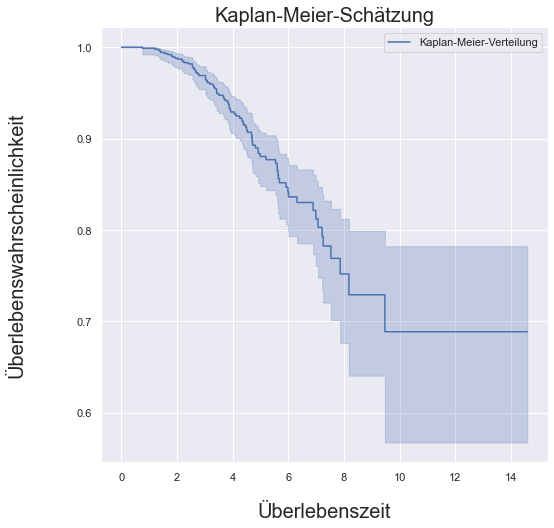

In [9]:
sys.path.append(r"C:\Users\julia\Documents\7.Semester\Bachelorarbeit\Funktionen")
#Funktion aus der Datei importieren
from KM_und_NA import Kaplan_Meier_def
#Funktion ausführen
Kaplan_Meier_def(df)

**Kaplan-Meier-Schätzung ohne Konfidenzitervalle:**

<Figure size 576x576 with 0 Axes>

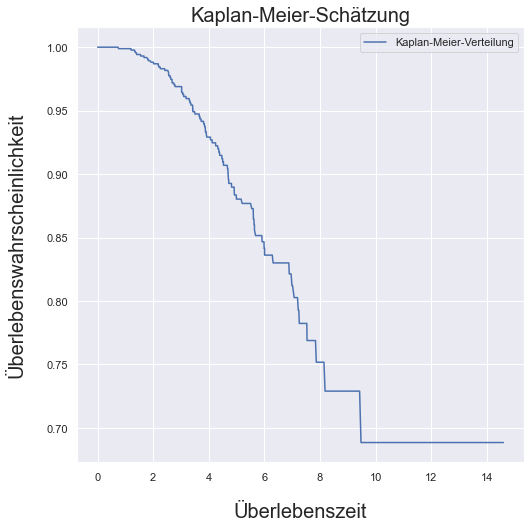

In [10]:
sys.path.append(r"C:\Users\julia\Documents\7.Semester\Bachelorarbeit\Funktionen")
#Funktion aus der Datei importieren
from KM_und_NA import Kaplan_def
#Funktion ausführen
Kaplan_def(df)

## Nelson-Aalen-Schätzer
Eine Nelson-Aalen-Schätzung wird durchgeführt. Die Nelson-Aalen-Schätzung ist ein nichtparametrisches Verfahren.
Dise gibt die Wahrscheinlichkeit an, dass ein bestimmtes Ereignis zum Zeitpunkt t eintritt.

Grafik:
Die Ausfallrate beginnt bei 0.
Das Konfidenzintervall ist schraffierte eingezeichnet. Dieses steig mit der Zunahme der Ausfallrate. Da die Genauigkeit der Schätzung abnimmt.

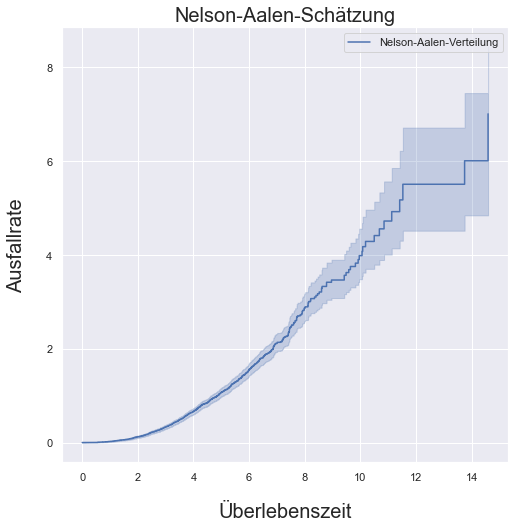

In [18]:
#Alle Null-Werte werden unter einer neuen Variable mit 1 ersetzt
df.loc[df.Zensur == 0, 'Zensur_2'] = 1 # zensiert
#Alle Werte mit 1 werden unter einer neuen Variable mit 0 ersetzt
df.loc[df.Zensur == 1, 'Zensur_2'] = 0 # Fehler/ Ausfall
#Tabelle anzeigen
sys.path.append(r"C:\Users\julia\Documents\7.Semester\Bachelorarbeit\Funktionen")
#Funktion aus der Datei importieren
from Nelson_Aalen import Nelson_Aalen_def
#Funktion ausführen
Nelson_Aalen_def(df)

## Vergleich: Kaplan-Meier und Nelson-Aalen Schätzung
Beide Verteilungen werden in eine Grafik dargestellt.


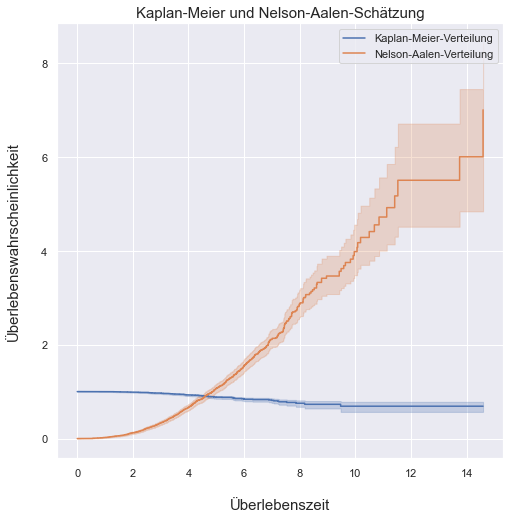

In [19]:
sys.path.append(r"C:\Users\julia\Documents\7.Semester\Bachelorarbeit\Funktionen")
#Funktion aus der Datei importieren
from Nelson_Aalen import Beide_Verteilungen_def
#Funktion ausführen
Beide_Verteilungen_def(df)

## Weibul-Verteilung
Gibt Aussagen über die Ausfallwahrscheinlichkeit zu bestimmten Laufzeiten.


Bei der Lebensdauer darf der Wert 0 nicht vorkommen. Darum werden alle Lebensdauer-Werte mit 0,00001 addiert.

In [40]:
#Überprüfen, ob es einen Null-Wert gibt
a = 0 in df.Lebensdauer 
#Wenn diese Aussage wahr ist, dann wird ein kleiner Wert dazu addiert
if a == True:
    print('Der Wert Null kommt vor.\nUm die Weibull-Verteilung durchzuführen, wird zu den Werten der Lebensdauer 1E-15 hinzuaddiert.')
    df.Lebensdauer = df.Lebensdauer + 1e-15
#Wenn diese Aussage falsch ist, dann kommt eine Meldung
else:
    print('Der Wert Null kommt NICHT vor')

Der Wert Null kommt vor.
Um die Weibull-Verteilung durchzuführen, wird zu den Werten der Lebensdauer 1E-15 hinzuaddiert.


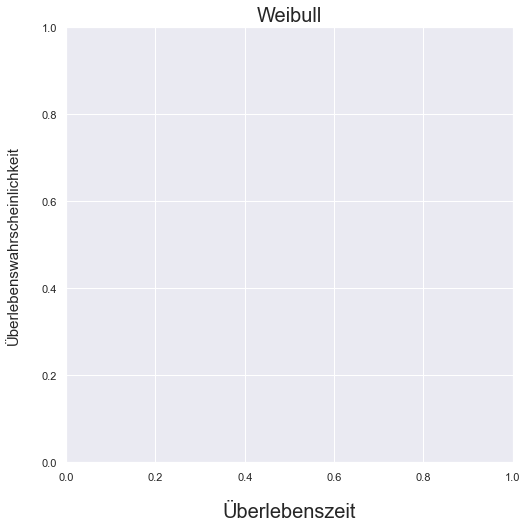

Für diese Weibullverteilung ergibt sich ein Lamda-Wert von 14.450 
Für diese Weibullverteilung ergibt sich ein Rho-Wert von  2.126


In [42]:
#Weibull-Verteilung
wbf = WeibullFitter().fit(df["Lebensdauer"], df["Zensur"], label='Weibull')
#Grafik plotten
sns.set(rc={'figure.figsize':(8,8)})
plt.figure()
wbf.plot_survival_function
#Überschrift
plt.title("Weibull",fontsize=20)
#Benennung der y-Achse
plt.ylabel("Überlebenswahrscheinlichkeit",fontsize=15, labelpad=20)
#Benennung der x-Achse
plt.xlabel("Überlebenszeit",fontsize=20, labelpad=20)
plt.show()
#wbf.params_ Befehl, um die Parameter µ und sigma auszugeben
l=wbf.lambda_
r=wbf.rho_
print('Für diese Weibullverteilung ergibt sich ein Lamda-Wert von',"%.3f" %l,'\nFür diese Weibullverteilung ergibt sich ein Rho-Wert von ',"%.3f" %r)

Die zwei Parameter Lamda und Rho werden berechnet:

In [79]:
#wbf.params_
l=wbf.lambda_ #Maßstab
r=wbf.rho_    #Form
print('Für diese Weibullverteilung ergibt sich ein Lamda-Wert von',"%.3f" %l,'\nFür diese Weibullverteilung ergibt sich ein Rho-Wert von ',"%.3f" %r)

Für diese Weibullverteilung ergibt sich ein Lamda-Wert von 14.450 
Für diese Weibullverteilung ergibt sich ein Rho-Wert von  2.126


## Lognormal-Verteilung



Der Minimal-Wert der Lebensdauer beträgt 0
Der Minimal-Wert der Lebensdauer beträgt 15
Sigma entspricht: 0.55 
µ entspricht: 1.30


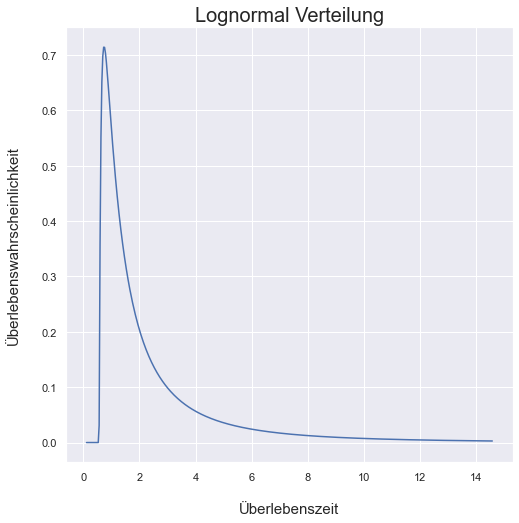

In [20]:
sys.path.append(r"C:\Users\julia\Documents\7.Semester\Bachelorarbeit\Funktionen")
#Funktion aus der Datei importieren
from Lognormal_Fkt import Lognormal_def
#Funktion ausführen
Lognormal_def(df)

## Cox-Regression
Verfahren um die Auswirkung der Einflüsse auf das eintretende Ereigniszu schätzen.

Um die Cox-Regression durchzuführen, muss zuerst die Anzahl der Variablen, sowie deren Bennenung eingegeben werden.(Groß- und Kleinschreibung beachten)

Wie viele Variableln wollen Sie testen? (Zahl eingeben)2
Bitte geben Sie die Variable ein:  Modell
Sie haben folgende Variablen eingegeben:Modell
Bitte geben Sie die Variable ein:  Baujahr
Sie haben folgende Variablen eingegeben:Baujahr


<Figure size 288x288 with 0 Axes>

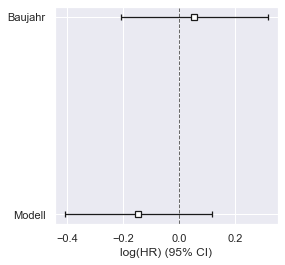

,coef,exp(coef),se(coef),coef lower 95%,coef upper 95%,exp(coef) lower 95%,exp(coef) upper 95%,cmp to,z,p,-log2(p)
covariate,,,,,,,,,,,
Modell,-0.145781,0.864347,0.134036,-0.408487,0.116925,0.664655,1.124036,0.0,-1.087623,0.276762,1.853283
Baujahr,0.055390,1.056953,0.134287,-0.207807,0.318588,0.812363,1.375185,0.0,0.412478,0.679989,0.556416


In [58]:
#Eine Tabelle wird mit den Variablen Lebensdauer und Zensur erstellt
Variablen=['Lebensdauer','Zensur']
Tabelle=df.loc[:,Variablen]
#Abfrage wie viele Variablen untersucht werden sollen
C_R = input('Wie viele Variableln wollen Sie testen? (Zahl eingeben)')
#Schleife die alle eingegebene Variablen in die Tabelle hinzufügt
for x in range(0, int(C_R)):
    a = input('Bitte geben Sie die Variable ein:  ')
    Tabelle.insert(x, a ,df[a],True)
    print('Sie haben folgende Variablen eingegeben:'+ a)
    if x == C_R:
       break 
cph = CoxPHFitter()
#Grafik plotten
plt.figure()
#durations = Lebensdauer; event_observed = Zensur
cph. fit(Tabelle, duration_col = 'Lebensdauer', event_col = 'Zensur')
plt.figure()
sns.set(rc={'figure.figsize':(4,4)})
cph.plot()
plt.show()
#Tabelle mit den ausgewerteten Werten
cph.summary

Auswertung: Wichtige Einflussfaktoren hierbei ist zum einen der p-Wert. Dieser ist unter einem Wert vom 0,05 Signifikant. Somit hat die Variable einen größeren Einfluss. 

In [56]:
from lifelines import WeibullAFTFitter
weibull_aft = WeibullAFTFitter()
weibull_aft.fit(df, duration_col='Lebensdauer', event_col='Zensur')
print(weibull_aft.median_survival_time_)
print(weibull_aft.mean_survival_time_)


1062639.739347068
1086292.3959315931
